✅ Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

🧪 Confusion Matrix:
 [[ 7  1]
 [ 1 11]]


C:\Users\Hema\AppData\Local\Temp\ipykernel_37668\1941785698.py:47: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\TARU\V th year\Intelligent Cyber security Lab\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


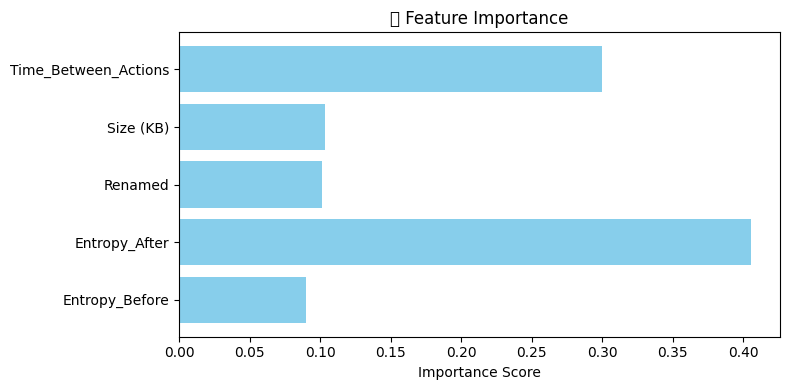

✅ Model saved as 'ransomware_detector_model.pkl'


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ransomware_dataset.csv")

# Convert "Yes"/"No" in 'Renamed' and "Benign"/"Ransomware" in 'Label' to 1/0
df["Renamed"] = df["Renamed"].map({"Yes": 1, "No": 0})
df["Label"] = df["Label"].map({"Ransomware": 1, "Benign": 0})

# Convert "Time_Between_Actions" from "xx sec" to float
df["Time_Between_Actions"] = (
    df["Time_Between_Actions"].str.replace(" sec", "").astype(float)
)

# Features and target
X = df[
    ["Entropy_Before", "Entropy_After", "Renamed", "Size (KB)", "Time_Between_Actions"]
]
y = df["Label"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("🧪 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
importances = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances, color="skyblue")
plt.title("🔍 Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

import joblib

# Save the model
joblib.dump(clf, "ransomware_detector_model.pkl")
print("✅ Model saved as 'ransomware_detector_model.pkl'")